In [135]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
def get_time_s(t):
    print(t)
    res = 0
    if t.find('m') != -1: #xxmxxs
        m,s = t.split('m')[:2]
        res += int(m) * 60
        if s == '': 
            return res
        else:
            t = s
    if t[-1] == 's':
        res += float(t[:-1])
    return res 

def get_time_m(t): #get round minutes
    return round(get_time_s(t) / 60)

def get_df_from_data(dataset_name, times, callers):
    caller_names = [n.strip() for n in callers.split(' ')]
    print(caller_names)
    assert len(caller_names) == 4
    ts = times.split(' ')
    ts = [get_time_s(t.strip()) for t in ts]
    assert len(ts) == 4
    Dataset = [dataset_name] * len(ts)
    df = pd.DataFrame([caller_names, Dataset, ts]).T
    df.columns=['Caller', 'Dataset', 'Runtime']    
    return df

['rabbitvar', 'strelka', 'mutect2', 'vardict']
31m
34m
218m
490m
['rabbitvar', 'strelka', 'mutect2', 'vardict']
34m
100m
387m
1020m
      Caller Dataset Runtime
0  rabbitvar     FD2    1860
1    strelka     FD2    2040
2    mutect2     FD2   13080
3    vardict     FD2   29400
0  rabbitvar     Mix    2040
1    strelka     Mix    6000
2    mutect2     Mix   23220
3    vardict     Mix   61200


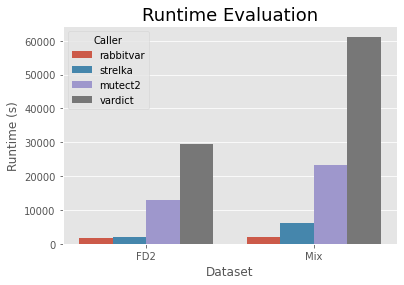

In [112]:
#------------------FD_2 data run time eva    
#FD_Times = """30m55 34m 218m 490m"""
FD_Times = """31m 34m 218m 490m"""
Mix_Times="""34m 100m 387m 1020m"""
Names="""rabbitvar strelka mutect2 vardict"""
df_fd = get_df_from_data('FD2', FD_Times, Names)
df_mix = get_df_from_data('Mix', Mix_Times, Names)
df = pd.concat([df_fd, df_mix], axis=0)
print(df)
import seaborn as sns
plt.title("Runtime Evaluation", fontsize=18,)
p = sns.barplot(x="Dataset", y="Runtime", hue="Caller", data=df,)
p.set_ylabel("Runtime (s)")
plt.savefig('runtimes.pdf', format='PDF')
# plt.figure(figsize=(9,6))
# plt.bar(caller_names, ts)

34m
100m
387m
1020m
      Caller Dataset Runtime
0  rabbitvar     Mix    2040
1    strelka     Mix    6000
2    mutect2     Mix   23220
3    vardict     Mix   61200
      Caller Dataset Runtime
0  rabbitvar     FD2    1800
1    strelka     FD2    2040
2    mutect2     FD2   13080
3    vardict     FD2   29400
0  rabbitvar     Mix    2040
1    strelka     Mix    6000
2    mutect2     Mix   23220
3    vardict     Mix   61200
0  rabbitvar     Mix    2040
1    strelka     Mix    6000
2    mutect2     Mix   23220
3    vardict     Mix   61200


TypeError: 'AxesSubplot' object is not iterable

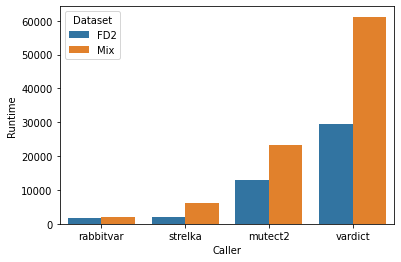

In [40]:
# Times="""34m 100m 387m 1020m"""
# Names="rabbitvar strelka mutect2 vardict"
# caller_names = [n.strip() for n in Names.split(' ')]
# ts_text = Times.split(' ')
# ts = [get_time_s(t.strip()) for t in ts_text]
# Dataset=['Mix'] * len(ts)
# tmp = pd.DataFrame([caller_names, Dataset, ts]).T
# tmp.columns=['Caller', 'Dataset', 'Runtime']
# print(tmp)
# df = pd.concat([df, tmp], axis=0)
# print(df)
# import seaborn as sns
# ax = sns.barplot(x="Caller", y="Runtime", hue="Dataset", data=df)
# plt.figure(figsize=(9,6))
# bar_plt = plt.bar(caller_names, ts, width=0.6)
# for rect in ax:
#     height = rect.get_height()
#     plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

15m51.477s
24m31.632s
33m36.350s
41m51.369s
52m41.186s
61m7.076s
66m10.007s
81m35.621s
90m16.916s
100m24.685s


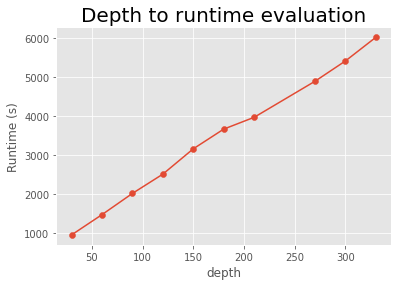

In [113]:
#-------draw depth (tumor Xx, normal Xx)- runtime pic ---------------
rt_str = "15m51.477s 24m31.632s 33m36.350s 41m51.369s 52m41.186s 61m7.076s 66m10.007s 81m35.621s 90m16.916s 100m24.685s"
runtimes = [get_time_s(x) for x in rt_str.split(' ')]
depth = [30, 60, 90, 120, 150, 180, 210, 270, 300, 330]
plt.plot(depth, runtimes)
plt.scatter(depth, runtimes)
plt.xlabel("depth")
plt.ylabel("Runtime (s)")
plt.title("Depth to runtime evaluation", fontsize=20,)
plt.show()

15m51.585s
20m0.277s
23m55.003s
28m9.766s
32m4.961s
35m58.762s
39m57.513s
43m29.862s
47m18.722s
52m24.296s
56m12.075s
83m13.571s
119m0.733s
140m1.831s
165m3.857s
177m4.349s
161m48.379s
188m35.092s
243m53.303s
232m51.993s
298m26.188s
309m56.644s


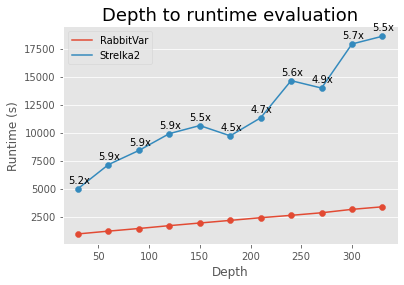

In [126]:
#-------draw depth （tumor Xx, normal 30x）- runtime pic ---------------
rt_str = "15m51.585s 20m0.277s 23m55.003s 28m9.766s 32m4.961s 35m58.762s 39m57.513s 43m29.862s 47m18.722s 52m24.296s 56m12.075s"
strelka_str = "83m13.571s 119m0.733s 140m1.831s 165m3.857s 177m4.349s 161m48.379s 188m35.092s 243m53.303s 232m51.993s 298m26.188s 309m56.644s"
runtimes = [get_time_s(x) for x in rt_str.split(' ')]
runtimes_strelka = [get_time_s(x) for x in strelka_str.split(' ')]
depth = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]

# ## using sns style
# df = pd.DataFrame([depth, runtimes, runtimes_strelka]).T
# df.columns = ['depth', 'RabbitVar', 'Strelka2']
# import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# sns.lineplot(data = df, x = 'depth', y = 'RabbitVar', markers="o",)
# sns.lineplot(data = df, x = 'depth', y = 'Strelka2', markers="o",)

plt.style.use('ggplot')
plt.grid(axis="x") 
plt.xlabel("Depth")
plt.ylabel("Runtime (s)")
plt.title("Depth to runtime evaluation", fontsize=18,)

plt.plot(depth, runtimes, label='RabbitVar')
plt.scatter(depth, runtimes)
plt.plot(depth, runtimes_strelka, label = 'Strelka2')
plt.scatter(depth, runtimes_strelka)
plt.legend()

for i in range(len(depth)):
    plt.text(depth[i] - 10, runtimes_strelka[i]+500, f'{runtimes_strelka[i]/runtimes[i]:.1f}x')

plt.savefig('Detpth2Rtime.pdf', format='PDF')
plt.show()

15m51.585s
20m0.277s
23m55.003s
28m9.766s
32m4.961s
35m58.762s
39m57.513s
43m29.862s
47m18.722s
52m24.296s
56m12.075s
83m13.571s
119m0.733s
140m1.831s
165m3.857s
177m4.349s
161m48.379s
188m35.092s
243m53.303s
232m51.993s
298m26.188s
309m56.644s
103m
178m
276m
381m
497m
639m
751m
684m
1056m
1383m
1577m
2015m
2458m
2969m


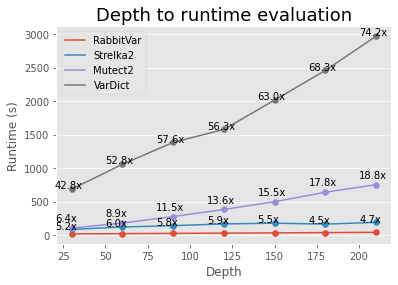

In [143]:
def add_speedup_text(rt_x, rt_rabv, depth, yplus):
    for i in range(len(depth)):
        plt.text(depth[i] - 10, rt_x[i] + yplus, f'{rt_x[i]/rt_rabv[i]:.1f}x')

#-------draw depth （tumor Xx, normal 30x）- runtime pic-- tmp: vardict&mutect ---------------
rt_str = "15m51.585s 20m0.277s 23m55.003s 28m9.766s 32m4.961s 35m58.762s 39m57.513s 43m29.862s 47m18.722s 52m24.296s 56m12.075s"
strelka_str = "83m13.571s 119m0.733s 140m1.831s 165m3.857s 177m4.349s 161m48.379s 188m35.092s 243m53.303s 232m51.993s 298m26.188s 309m56.644s"
mutect2_str = "103m 178m 276m 381m 497m 639m 751m"
vardict_str = "684m 1056m 1383m 1577m 2015m 2458m 2969m"
runtimes = [get_time_m(x) for x in rt_str.split(' ')][:7]
runtimes_strelka = [get_time_m(x) for x in strelka_str.split(' ')][:7]
runtimes_mutect2 = [get_time_m(x) for x in mutect2_str.split(' ')]
runtimes_vardict = [get_time_m(x) for x in vardict_str.split(' ')]
depth = [30, 60, 90, 120, 150, 180, 210] #, 240, 270, 300, 330]


# ## using sns style
# df = pd.DataFrame([depth, runtimes, runtimes_strelka]).T
# df.columns = ['depth', 'RabbitVar', 'Strelka2']
# import matplotlib
# matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# sns.lineplot(data = df, x = 'depth', y = 'RabbitVar', markers="o",)
# sns.lineplot(data = df, x = 'depth', y = 'Strelka2', markers="o",)

plt.style.use('ggplot')
plt.grid(axis="x") 
plt.xlabel("Depth")
plt.ylabel("Runtime (s)")
plt.title("Depth to runtime evaluation", fontsize=18,)

plt.plot(depth, runtimes, label='RabbitVar')
plt.scatter(depth, runtimes)
plt.plot(depth, runtimes_strelka, label = 'Strelka2')
plt.scatter(depth, runtimes_strelka)
plt.legend()
plt.plot(depth, runtimes_mutect2, label='Mutect2')
plt.scatter(depth, runtimes_mutect2)
plt.plot(depth, runtimes_vardict, label = 'VarDict')
plt.scatter(depth, runtimes_vardict)
plt.legend()

add_speedup_text(runtimes_strelka, runtimes, depth, 10 )
add_speedup_text(runtimes_mutect2, runtimes, depth, 100)
add_speedup_text(runtimes_vardict, runtimes, depth, 10 )
plt.savefig('Detpth2Rtime.pdf', format='PDF')
plt.show()

# Detection result evaluation

['type', 'total.truth', 'total.query', 'tp', 'fp', 'fn', 'recall', 'precision', 'f1-score']


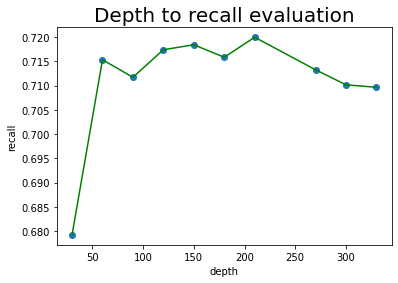

In [23]:
#--------rabbitvar result evaluation------------------#
val_result="""indels          1939            8666            1317            7349            622             0.6792160907684374      0.15197322870990077     0.24837340876944836
indels          1939            8263            1387            6876            552             0.7153171738009283      0.16785671063778287     0.27190746912370123
indels          1939            8107            1380            6727            559             0.7117070654976793      0.17022326384605896     0.274736213418276
indels          1939            7971            1391            6580            548             0.7173800928313564      0.17450759001380003     0.2807265388496468
indels          1939            7936            1393            6543            546             0.7184115523465704      0.17552923387096775     0.28212658227848103
indels          1939            7806            1388            6418            551             0.7158329035585353      0.17781193953369204     0.28486403283735245
indels          1939            7755            1396            6359            543             0.7199587416193914      0.18001289490651193     0.2880132040437384
indels          1939            7566            1383            6183            556             0.7132542547705003      0.18279143536875495     0.2910047343503419
indels          1939            7512            1377            6135            562             0.7101598762248582      0.18330670926517573     0.29139773568934507
indels          1939            7473            1376            6097            563             0.7096441464672512      0.18412953298541415     0.29239269018274544"""
col_names=["type","total.truth","total.query","tp","fp", "fn", "recall", "precision", "f1-score"]
print(col_names)
depth = [30, 60, 90, 120, 150, 180, 210, 270, 300, 330]
data = [x.split() for x in val_result.split('\n')]
data = pd.DataFrame(data, columns=col_names)

recalls = [float(x) for x in list(data['recall'])]
plt.plot(depth, recalls, color='g')
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel("recall")
plt.title("Depth to recall evaluation", fontsize=20,)
plt.show()

['type', 'total.truth', 'total.query', 'tp', 'fp', 'fn', 'recall', 'precision', 'f1-score']


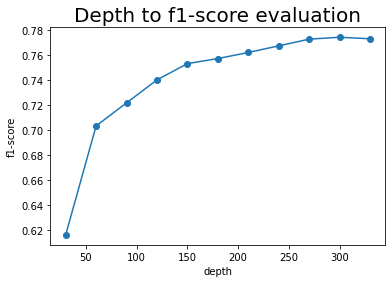

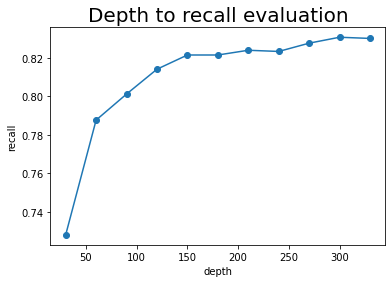

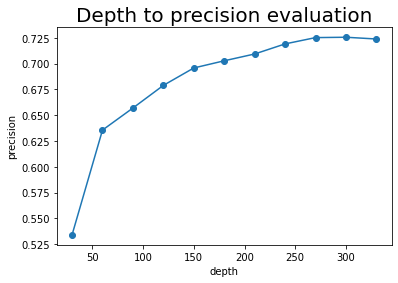

In [8]:
#--------rabbitvar result evaluation: T Xx, N 30x------------------#
val_result="""indels          1625            2215            1183            1032            442             0.728                   0.5340857787810384      0.6161458333333334
indels          1625            2014            1280            734             345             0.7876923076923077      0.6355511420059583      0.7034899697719155
indels          1625            1982            1302            680             323             0.8012307692307692      0.656912209889001       0.7219295813695592
indels          1625            1949            1323            626             302             0.8141538461538461      0.6788096459722934      0.740346950195859
indels          1625            1919            1335            584             290             0.8215384615384616      0.6956748306409588      0.7533860045146726
indels          1625            1900            1335            565             290             0.8215384615384616      0.7026315789473684      0.7574468085106383
indels          1625            1888            1339            549             286             0.824                   0.7092161016949152      0.762311414745232
indels          1625            1861            1338            523             287             0.8233846153846154      0.7189682966147233      0.7676419965576592
indels          1625            1855            1345            510             280             0.8276923076923077      0.7250673854447439      0.7729885057471263
indels          1625            1861            1350            511             275             0.8307692307692308      0.7254164427727029      0.7745266781411361
indels          1625            1864            1349            515             276             0.8301538461538461      0.7237124463519313      0.7732874749211808"""
col_names=["type","total.truth","total.query","tp","fp", "fn", "recall", "precision", "f1-score"]
print(col_names)
depth = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
data = [x.split() for x in val_result.split('\n')]
data = pd.DataFrame(data, columns=col_names)

tag = "f1-score"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()
tag = "recall"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()
tag = "precision"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()

['type', 'total.truth', 'total.query', 'tp', 'fp', 'fn', 'recall', 'precision', 'f1-score']


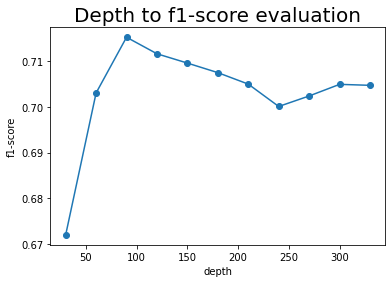

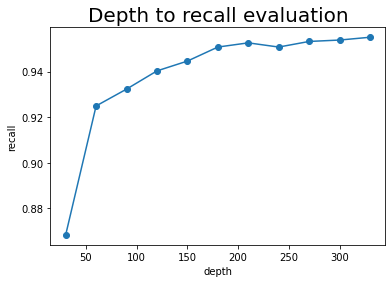

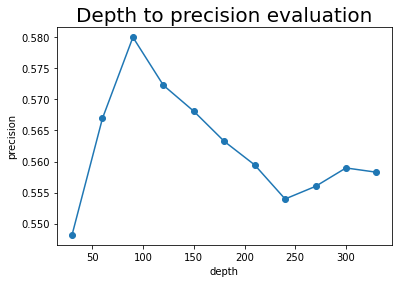

In [11]:
#--------rabbitvar result evaluation: T Xx, N 30x------------------#
#------------ReRun_MoreFeature: xgboost-------------#
val_result="""indels          1625            2574            1411            1163            214             0.8683076923076923         0.5481740481740481      0.6720647773279352
indels          1625            2651            1503            1148            122             0.924923076923077          0.5669558657110524      0.7029934518241348
indels          1625            2612            1515            1097            110             0.9323076923076923         0.5800153139356815      0.7151286287467549
indels          1625            2670            1528            1142            97              0.9403076923076923         0.5722846441947566      0.7115250291036088
indels          1625            2702            1535            1167            90              0.9446153846153846         0.5680977054034049      0.7094984978044834
indels          1625            2743            1545            1198            80              0.9507692307692308         0.5632519139628145      0.7074175824175825
indels          1625            2767            1548            1219            77              0.9526153846153846         0.5594506685941453      0.7049180327868851
indels          1625            2789            1545            1244            80              0.9507692307692308         0.5539619935460739      0.7000453103760762
indels          1625            2786            1549            1237            76              0.9532307692307692         0.5559942569992822      0.7023350714123783
indels          1625            2773            1550            1223            75              0.9538461538461539         0.5589614136314461      0.7048658481127785
indels          1625            2780            1552            1228            73              0.955076923076923          0.5582733812949641      0.7046538024971623"""
col_names=["type","total.truth","total.query","tp","fp", "fn", "recall", "precision", "f1-score"]
print(col_names)
depth = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
data = [x.split() for x in val_result.split('\n')]
data = pd.DataFrame(data, columns=col_names)

tag = "f1-score"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()
back_morefeature_xgboost = recalls
tag = "recall"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()
tag = "precision"
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Depth to {} evaluation".format(tag), fontsize=20,)
plt.show()

['type', 'total.truth', 'total.query', 'tp', 'fp', 'fn', 'recall', 'precision', 'f1-score']


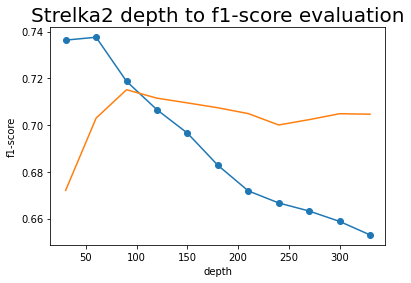

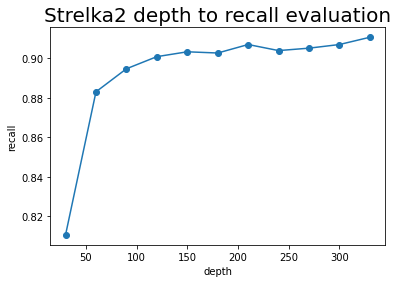

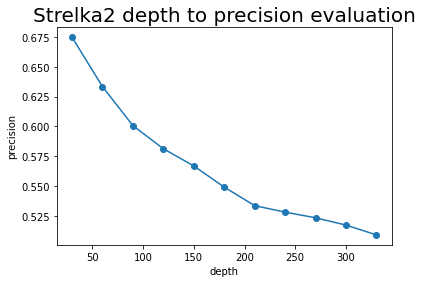

In [12]:
#--------strelka result evaluation: T Xx, N 30x------------------#
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
val_result="""indels          1625            1952            1317            635             308             0.8104615384615385      0.6746926229508197      0.7363712608331003
indels          1625            2266            1435            831             190             0.8830769230769231      0.6332744924977934      0.7375995887946543
indels          1625            2421            1454            967             171             0.8947692307692308      0.600578273440727       0.7187345526445872
indels          1625            2519            1464            1055            161             0.9009230769230769      0.5811830091306074      0.7065637065637066
indels          1625            2590            1468            1122            157             0.9033846153846153      0.5667953667953668      0.6965599051008303
indels          1625            2672            1467            1205            158             0.9027692307692308      0.5490269461077845      0.6828019548522226
indels          1625            2763            1474            1289            151             0.9070769230769231      0.5334781035106768      0.6718322698268003
indels          1625            2782            1469            1313            156             0.904                   0.5280373831775701      0.6666666666666667
indels          1625            2811            1471            1340            154             0.9052307692307693      0.5233013162575596      0.663210099188458
indels          1625            2850            1474            1376            151             0.9070769230769231      0.5171929824561403      0.6587709497206704
indels          1625            2908            1480            1428            145             0.9107692307692308      0.5089408528198074      0.6529891903816456"""
col_names=["type","total.truth","total.query","tp","fp", "fn", "recall", "precision", "f1-score"]
print(col_names)
depth = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
data = [x.split() for x in val_result.split('\n')]
data = pd.DataFrame(data, columns=col_names)

tag = 'f1-score'
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Strelka2 depth to {} evaluation".format(tag), fontsize=20,)
#---------compare different f1-score----------#
plt.plot(depth, back_morefeature_xgboost)
plt.show()

tag = 'recall'
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Strelka2 depth to {} evaluation".format(tag), fontsize=20,)
plt.show()

tag = 'precision'
recalls = [float(x) for x in list(data[tag])]
plt.plot(depth, recalls)
plt.scatter(depth, recalls)
plt.xlabel("depth")
plt.ylabel(tag)
plt.title("Strelka2 depth to {} evaluation".format(tag), fontsize=20,)
plt.show()



## AF bin count picture

In [70]:
##########---------------------------AF bin count picture---------------------------##
import numpy as np
import re
def get_variants(fname):
    vars = dict() #{site : var_items}
    filters = set()
    with open(fname, 'r') as f:
        for var in f:
            if var[0] == "#": continue
            items = var.split('\t')
            chrom, pos, id, ref, alt, _, filter = items[:7]
            #if filter.find('PASS') == -1: continue
            if len(chrom) > 6 or (len(ref) == 1 and len(alt) == 1): continue #only indels
            for alt_i in alt.split(","):
                site = chrom + ":" + pos + ":" + ref.upper() + ":" + alt_i.upper()
                vars[site] = items
    return vars

def get_variants_zip(fname):
    import gzip 
    vars = dict() #{site : var_items}
    filters = set()
    with gzip.open(fname, 'rb') as f:
        for var in f:
            var = var.decode('utf-8')
            if var[0] == "#": continue
            items = var.split('\t')
            chrom, pos, id, ref, alt, _, filter = items[:7]
            if filter.find('PASS') == -1: continue
            if len(chrom) > 6 or (len(ref) == 1 and len(alt) == 1): continue #only indels
            for alt_i in alt.split(","):
                site = chrom + ":" + pos + ":" + ref + ":" + alt_i
                vars[site] = items
    return vars

def get_af_bin(vars, s, e, by, af_express):
    res = dict()
    s = int(s * 100)
    e = int(e * 100)
    by = int(by * 100)
    by_f = by / 100
    for i in range(s, e + by, by):
        i = i / 100
        key = str(round(i, 2)) + '-' + str(round(i + by_f, 2))
        #print("----",key)
        res[key] = []
    by = by_f
    for var_site, var_items in vars.items():
        af = eval(af_express)
        bs, be = round((int(af / by)) * by, 2), round(int(af / by + 1) * by, 2)
        key = str(bs) + '-' + str(be)
        #print("key: ", key)
        res[key].append(var_site)
    return res


In [3]:
truth_file = '/home/data/data_share/FD/Truth/sINDEL.MDKT.superSet.v1.2.vcf'
truth_indels = get_variants(truth_file) 
res_file = '/home/user_home/haoz/workspace/RabbitVar/RandomForest/validate/indel.vcf'
rabvar_vars = get_variants(res_file)

In [4]:
af_express = 'float(var_items[7].split(\';\')[5][3:])'
variant_af_bin = get_af_bin(rabvar_vars, 0, 1, 0.02, af_express)
truth_af_express = 'float(re.search(r\';TVAF=(0\\.\\w+);\', var_items[7]).group(1))'
truth_af_bin = get_af_bin(truth_indels, 0, 1, 0.02, truth_af_express)

In [5]:
def get_val_res_by_afbin(rabvar, truth_vars):
    bins_to_res = dict() #recal, precision, f1-score
    bins = rabvar.keys()
    for bin_k, bin_truth_vars in truth_vars.items():
        count = 0
        bin_af_vars = rabvar[bin_k]
        for v in bin_truth_vars:
            if v in rabvar_vars:
                count += 1
        t_recall = count / len(bin_truth_vars) if len(bin_truth_vars) != 0 else 0
        t_prec = count / len(bin_af_vars) if len(bin_af_vars) != 0 else 0
        t_f1score = t_recall * t_prec * 2 / (t_recall + t_prec) if (t_recall != 0 or t_prec != 0) else 0
        bins_to_res[bin_k] = [t_recall, t_prec, t_f1score]
    return bins_to_res

bins_to_res = get_val_res_by_afbin(variant_af_bin, truth_af_bin)

           af       rec      prec      f1-s
0    0.0-0.02  0.000000  0.000000  0.000000
1   0.02-0.04  0.622951  0.000668  0.001334
2   0.04-0.06  0.876404  0.001815  0.003622
3   0.06-0.08  0.964286  0.004848  0.009648
4    0.08-0.1  0.905512  0.009385  0.018578
5    0.1-0.12  0.957895  0.010716  0.021195
6   0.12-0.14  0.913978  0.015793  0.031050
7   0.14-0.16  0.934783  0.024418  0.047593
8   0.16-0.18  1.000000  0.027767  0.054034
9    0.18-0.2  0.927711  0.045888  0.087450
10   0.2-0.22  0.887324  0.036501  0.070117
11  0.22-0.24  0.913043  0.058989  0.110818
12  0.24-0.26  0.923077  0.061728  0.115718
13  0.26-0.28  0.877551  0.054430  0.102503
14   0.28-0.3  0.890625  0.087289  0.158996
15   0.3-0.32  0.843137  0.071310  0.131498
16  0.32-0.34  0.830189  0.085938  0.155752
17  0.34-0.36  0.792453  0.096552  0.172131
18  0.36-0.38  0.857143  0.059553  0.111369
19   0.38-0.4  0.846154  0.098214  0.176000
20   0.4-0.42  0.729167  0.102041  0.179028
21  0.42-0.44  0.567568  0.06624

<AxesSubplot:xlabel='af', ylabel='f1-s'>

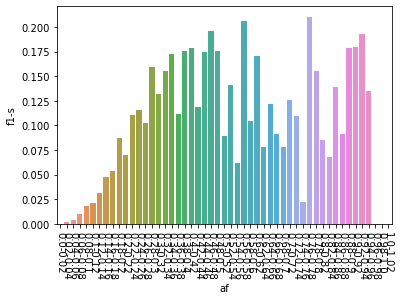

In [7]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
data = []
for k, v in bins_to_res.items():
    data.append([k, *v])
df = pd.DataFrame(data)
df.columns = ['af', 'rec', 'prec', 'f1-s']
print(df)
plt.xticks(rotation=270)
sns.barplot(x="af", y="f1-s", data=df)

In [75]:
truth_file = '/home/data/haoz/data/FD/Truth/sINDEL.MDKT.superSet.v1.2.vcf.gz'
truth_indels = get_variants_zip(truth_file) 

## Variant Allel Frequency / other fearture after Filter

In [96]:
indel_file = '/home/user_home/haoz/workspace/RabbitVar/RandomForest/validate/indel.vcf'
rabvar_vars = get_variants(indel_file)
truth_file = '/home/user_home/data_share/FD/Truth/sINDEL.MDKT.superSet.v1.2.vcf'
truth_indels = get_variants(truth_file)

In [97]:
1310 / len(truth_indels)

0.0657927778614836

In [98]:
# generate data
import pandas as pd
data = []
for var_site, var_items in rabvar_vars.items():
    af = float(var_items[7].split(';')[5][3:])
    if var_site in truth_indels:
        label = 1
    else:
        label = 0
    data.append([var_site, af, label])
res_data = pd.DataFrame(data, columns = ['site', 'af', 'label'])
print(sum(res_data['label'] == 1))
#     bs, be = round((int(af / by)) * by, 2), round(int(af / by + 1) * by, 2)
#     key = str(bs) + '-' + str(be)
#     #print("key: ", key)
#     res[key].append(var_site)

1434


In [99]:
res_data.head()

,site,af,label
0,chr1:810103:TC:T,0.125000,0
1,chr1:1649054:C:CT,0.071429,0
2,chr1:4318424:TA:T,0.259259,0
3,chr1:6940913:G:GGGGGGGGAGGGGGATCCTCACAGGGTGGGG...,0.100000,0
4,chr1:7048124:CG:C,0.054054,0


                                                   site        af  label
5                                     chr1:7186250:CA:C  0.945946      1
7     chr1:12316322:TTCTTTAGATGGGAATTTTTGAACGCCTTTCG...  0.146341      1
10                                   chr1:17551876:A:AC  0.083333      1
11                                   chr1:17782125:AG:A  0.344828      1
15                    chr1:22071109:TCTCGGCTCACTGCAAG:T  1.000000      1
...                                                 ...       ...    ...
2310              chr9:135725135:CAGGAAAACGGAGTCCTCAG:C  0.342857      1
2311                   chr9:135902989:GTGCATGCTAGTACT:G  0.327273      1
2312                              chr9:136252862:T:TCTG  0.690476      1
2313                             chr9:136324154:CCCGG:C  0.240000      1
2315                       chr9:137891642:CTGGAGCGGCA:C  0.340000      1

[1434 rows x 3 columns]


/home/user_home/haoz/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/user_home/haoz/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


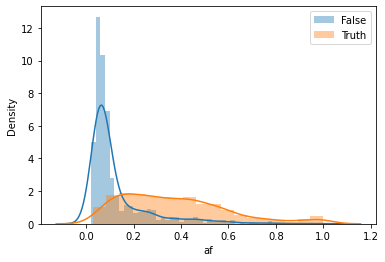

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
def preprocess(data):
    pass
def plt_one_data(data, feature):
    print(data[data['label'] == 1])
    sns.distplot(data[data['label'] == 0][feature], label = 'False')
    sns.distplot(data[data['label'] == 1][feature], label = "Truth")   
    plt.legend()
plt_one_data(res_data, 'af')    